In [1]:
import torch
import torchvision
import torchvision.models as models
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [3]:
from networks.networks import ExampleNet
from solver import Solver, load_solver
import data_visualization
import data_loader

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

Files already downloaded and verified
Files already downloaded and verified


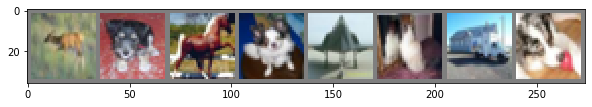

      deer      dog    horse      dog    plane      cat    truck      dog


In [4]:
batch_size = 64
subset_size = 1000
random_labels = False
#trainloader = data_loader.get_CIFAR10_trainset_loader(batch_size=4, subset_indices=subset_indices)

trainloader = data_loader.get_CIFAR10_trainset_loader(batch_size=batch_size, subset_size=subset_size, random_labels=random_labels)
testloader = data_loader.get_CIFAR10_testset_loader(batch_size=batch_size)
classes = data_loader.get_CIFAR10_classes()

data_visualization.show_samples(trainloader, classes)

In [5]:
net = ExampleNet()
# net = models.vgg16(pretrained=False)

# testloader=None
solver = Solver(net, trainloader, validationloader=testloader, optim = 'adam')

In [6]:
solver.train(num_epochs=3, 
                log_every=4, plot=True, verbose=False)

Loading BokehJS ...

In [7]:
solver.print_bokeh_plots()

Loading BokehJS ...

Loading BokehJS ...

In [8]:
PATH = './cifar_net.pth'
solver.save_model(PATH)

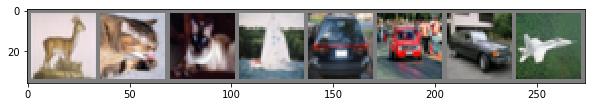

      Real:     deer      cat      cat     ship      car      car      car    plane
 Predicted:      dog      dog      dog    plane      car     frog      car    plane


In [9]:
solver.predict_samples(classes)

In [10]:
solver.print_class_accuracies(classes)

Accuracy of plane : 77 %
Accuracy of   car : 35 %
Accuracy of  bird :  1 %
Accuracy of   cat :  4 %
Accuracy of  deer :  0 %
Accuracy of   dog : 43 %
Accuracy of  frog : 52 %
Accuracy of horse :  4 %
Accuracy of  ship :  1 %
Accuracy of truck :  4 %


In [11]:
# solver.print_log()

In [12]:
solver.save_solver()

{'model': ExampleNet(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
), 'trainloader': <torch.utils.data.dataloader.DataLoader object at 0x7fc55be37d30>, 'validationloader': <torch.utils.data.dataloader.DataLoader object at 0x7fc55be37fd0>, 'optim': 'adam', 'criterion': 'cross_entropy_loss', 'optim_config': {'lr': 0.001}, 'lr_decay': 1.0, 'best_val_acc': 0.2248, 'val_acc_history': {0: 0, 1: 0.1669, 2: 0.205, 3: 0.2248}, 'loss_history': {3: 2.3064149022102356, 7: 2.30593478679657, 11: 2.293157398700714, 15: 2.294263005256653, 19: 2.2751709818840027, 23: 2.2366642355918884, 27: 2.1659486293792725, 31: 2.111714541912079, 35: 2.1067094206809998, 39: 2.1138

In [13]:
loaded_solver = load_solver()

{'model': ExampleNet(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
), 'trainloader': <torch.utils.data.dataloader.DataLoader object at 0x7fc55058cf98>, 'validationloader': <torch.utils.data.dataloader.DataLoader object at 0x7fc550500b00>, 'optim': 'adam', 'criterion': 'cross_entropy_loss', 'optim_config': {'lr': 0.001}, 'lr_decay': 1.0, 'best_val_acc': 0.2248, 'val_acc_history': {0: 0, 1: 0.1669, 2: 0.205, 3: 0.2248}, 'loss_history': {3: 2.3064149022102356, 7: 2.30593478679657, 11: 2.293157398700714, 15: 2.294263005256653, 19: 2.2751709818840027, 23: 2.2366642355918884, 27: 2.1659486293792725, 31: 2.111714541912079, 35: 2.1067094206809998, 39: 2.1138

In [14]:
loaded_solver.print_bokeh_plots()
loaded_solver.print_log()

Loading BokehJS ...

Loading BokehJS ...

[epoch, iteration] training loss | training accuracy
----------------------------------------------------
[    1,         4]    2.30641490 |        0.12109375
[    1,         8]    2.30593479 |        0.11328125
[    1,        12]    2.29315740 |        0.10937500
[    1,        16]    2.29426301 |        0.14375000
----------------------------------------------------
[    0,  finished]     accuracy: |        0.16690000

[epoch, iteration] training loss | training accuracy
----------------------------------------------------
[    2,         4]    2.27517098 |        0.16406250
[    2,         8]    2.23666424 |        0.17968750
[    2,        12]    2.16594863 |        0.19140625
[    2,        16]    2.11171454 |        0.17890625
----------------------------------------------------
[    1,  finished]     accuracy: |        0.20500000

[epoch, iteration] training loss | training accuracy
----------------------------------------------------
[    3,         4]    2.10670942 |        0.

In [17]:
loaded_solver.train(num_epochs=5, plot=True, verbose=True, log_every=4)

Loading BokehJS ...

[epoch, iteration] training loss | training accuracy
----------------------------------------------------
[   14,         4]    1.66000170 |        0.41015625
[   14,         8]    1.69211739 |        0.38671875
[   14,        12]    1.69535181 |        0.33203125
[   14,        16]    1.64026195 |        0.40000000
----------------------------------------------------
[    0,  finished]     accuracy: |        0.31890000

[epoch, iteration] training loss | training accuracy
----------------------------------------------------
[   15,         4]    1.63385281 |        0.41796875
[   15,         8]    1.63872510 |        0.39453125
[   15,        12]    1.66848633 |        0.37890625
[   15,        16]    1.59650922 |        0.41484375
----------------------------------------------------
[    1,  finished]     accuracy: |        0.33900000

[epoch, iteration] training loss | training accuracy
----------------------------------------------------
[   16,         4]    1.59158313 |        0.